In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as warn
from warnings import filterwarnings
filterwarnings("ignore")
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
file_path = '/content/twitter_training.csv'
df = pd.read_csv(file_path)

In [7]:
df.head()

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
data= pd.read_csv('/content/twitter_training.csv', names=['UserID', 'Trend', 'Sentiments', 'Text'])
data.head()

UserID        Trend Sentiments  \
0    2401  Borderlands   Positive   
1    2401  Borderlands   Positive   
2    2401  Borderlands   Positive   
3    2401  Borderlands   Positive   
4    2401  Borderlands   Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [10]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      74682 non-null  int64 
 1   Trend       74682 non-null  object
 2   Sentiments  74682 non-null  object
 3   Text        73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


UserID
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000

In [11]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [12]:
data.isna().sum()

UserID          0
Trend           0
Sentiments      0
Text          326
dtype: int64

In [13]:
#Eliminamos nulos
data.dropna(axis = 0 , inplace= True)

In [14]:
data.isna().sum()

UserID        0
Trend         0
Sentiments    0
Text          0
dtype: int64

In [15]:
data.shape

(71656, 4)

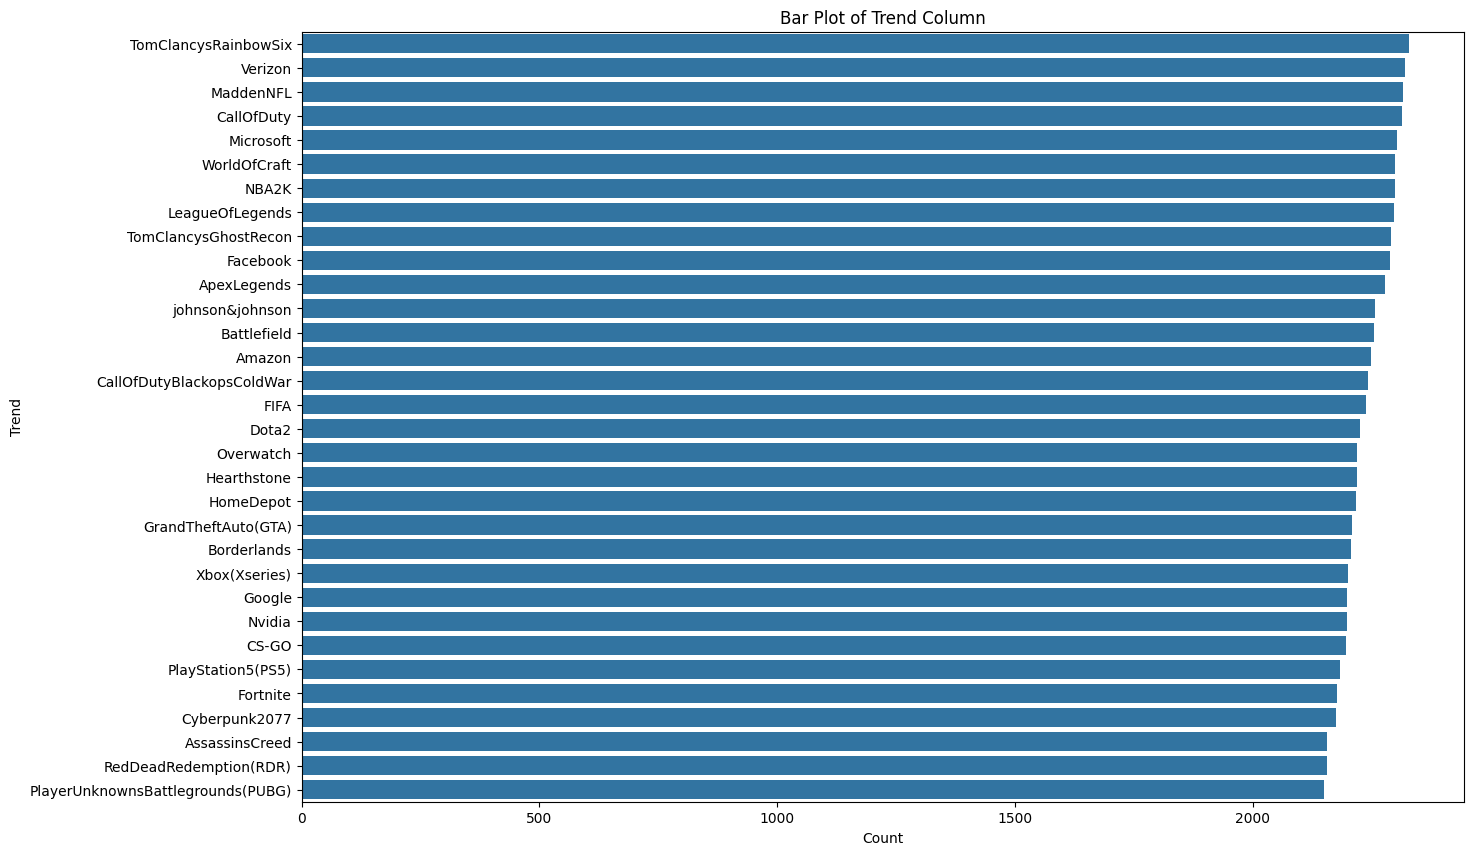

In [16]:
trend_counts = data['Trend'].value_counts()

plt.figure(figsize=(15,10))
sns.barplot(x=trend_counts.values, y=trend_counts.index)

plt.xlabel('Count')
plt.ylabel('Trend')
plt.title('Bar Plot of Trend Column')

plt.show()

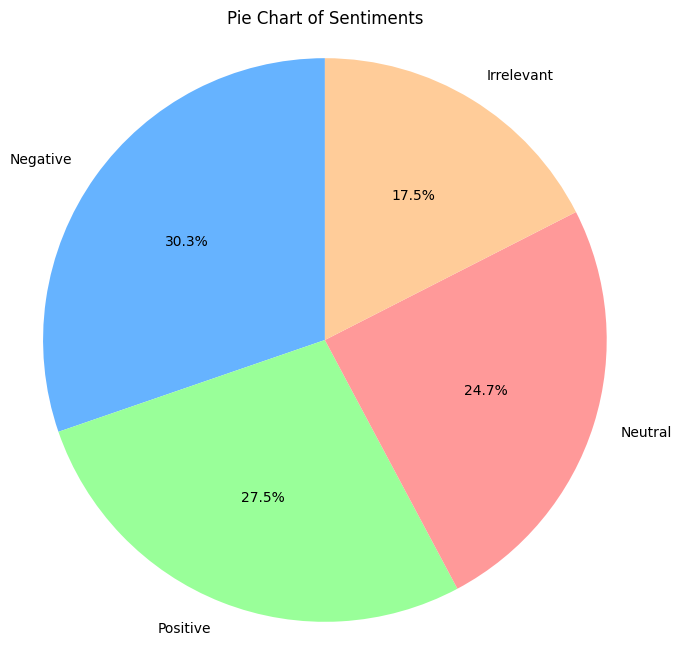

In [17]:
sentiment_counts = data['Sentiments'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ff9999','#ffcc99'])

plt.title('Pie Chart of Sentiments')
plt.axis('equal')
plt.show()

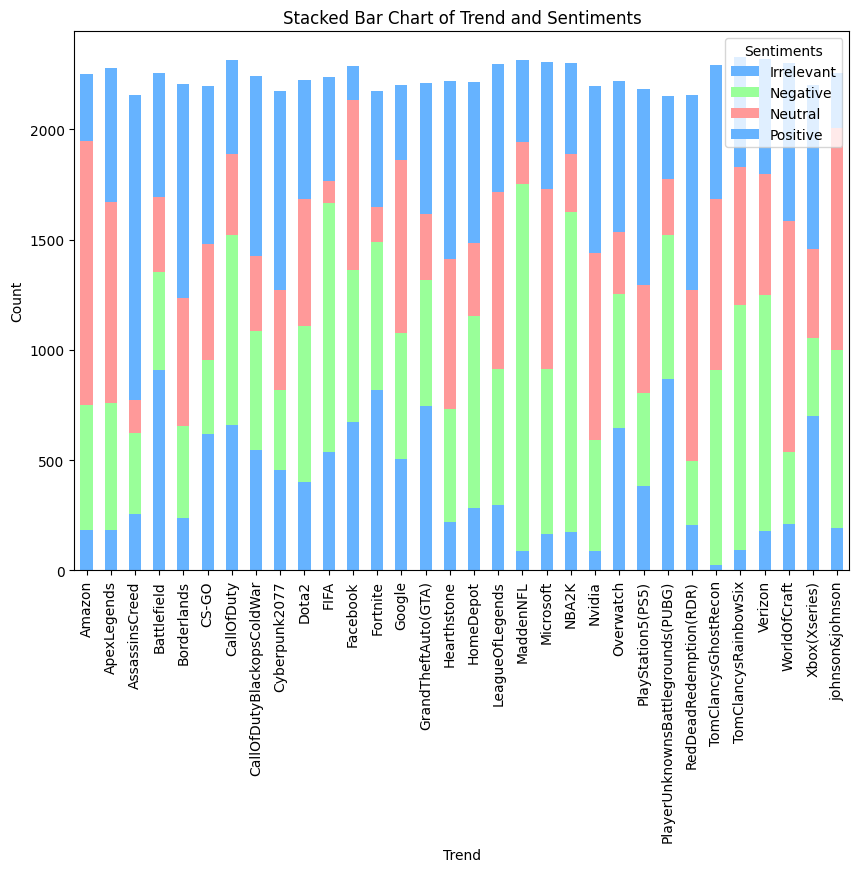

In [18]:
trend_sentiment = pd.crosstab(data['Trend'], data['Sentiments'])
trend_sentiment.plot(kind='bar', stacked=True, figsize=(10,7), color=['#66b3ff','#99ff99','#ff9999'])

plt.xlabel('Trend')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Trend and Sentiments')

plt.show()


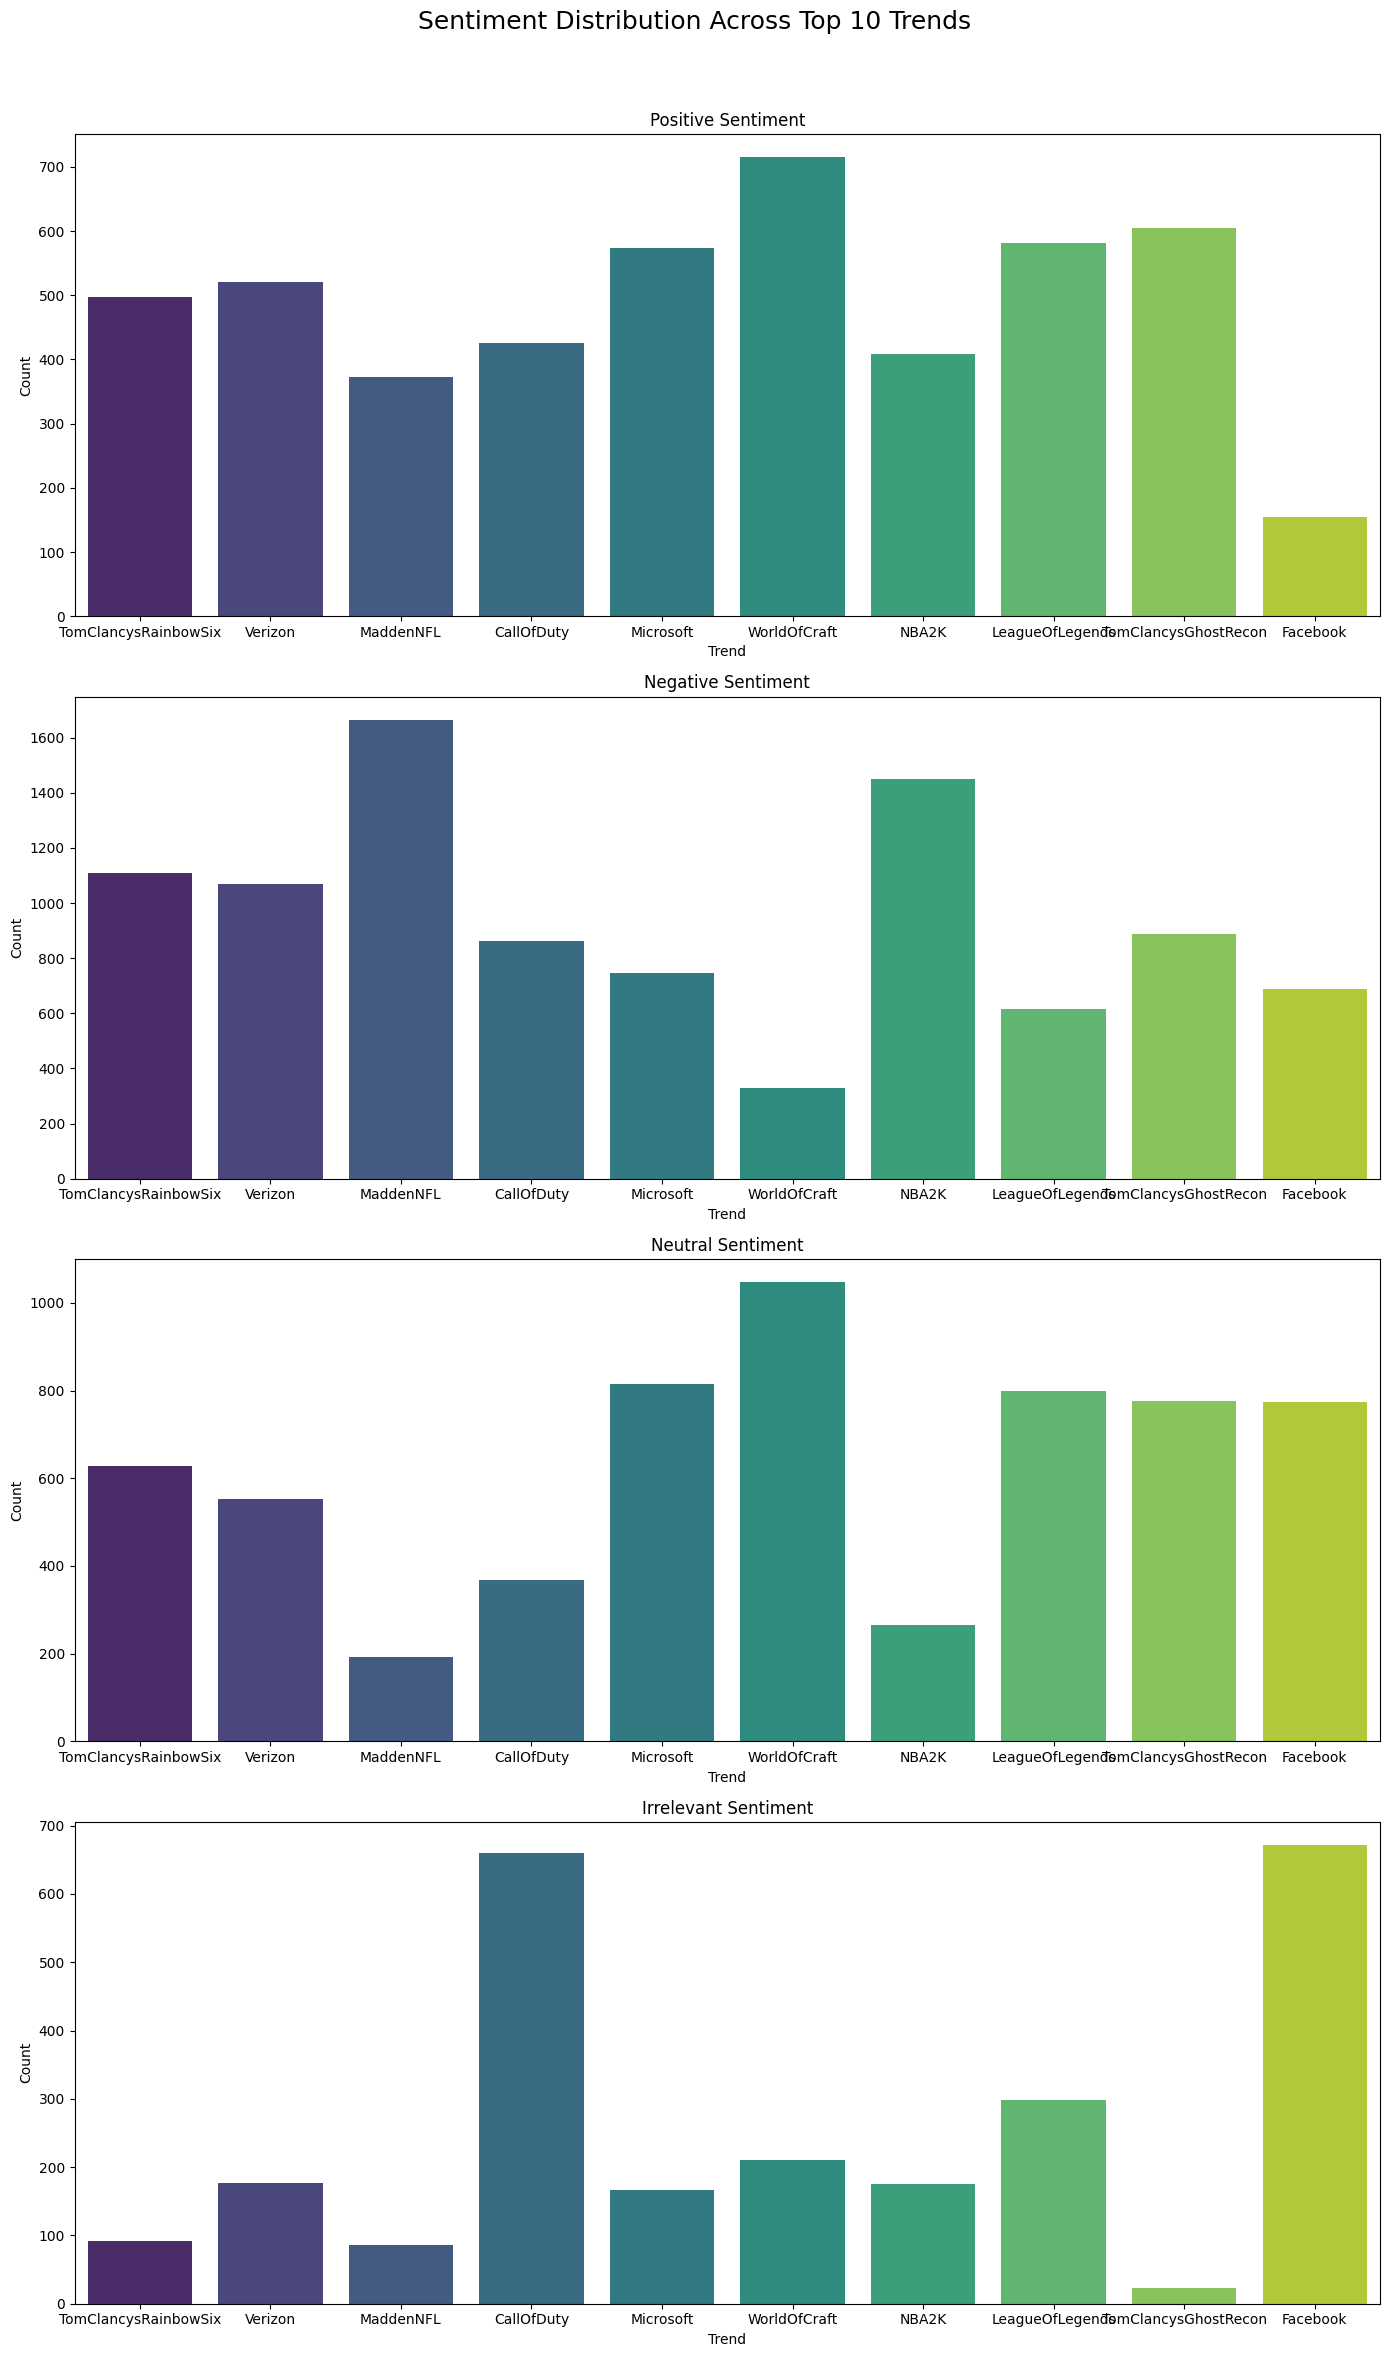

In [19]:
# Evaluamos los 10 más frecuentres trends
top_10_trends = data['Trend'].value_counts().nlargest(10).index

top_10_data = data[data['Trend'].isin(top_10_trends)]

fig, axes = plt.subplots(4, 1, figsize=(14, 24))
fig.suptitle('Sentiment Distribution Across Top 10 Trends', fontsize=18)
sentiments = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

for sentiment, ax in zip(sentiments, axes.flatten()):
    filtered_data = top_10_data[top_10_data['Sentiments'] == sentiment]
    sns.countplot(data=filtered_data, x='Trend', ax=ax, palette='viridis', order=top_10_trends)

    ax.set_title(f'{sentiment} Sentiment')
    ax.set_xlabel('Trend')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

In [20]:
# Eliminar espacios y caracteres ocultos en la columna Sentiments
data['Sentiments'] = data['Sentiments'].str.strip()

# Filtrar nuevamente
data = data[data['Sentiments'] != 'Irrelevant']

In [21]:
data = data.drop(data[data['Sentiments'] == 'Irrelevant'].index)

In [22]:
# Eliminar espacios y caracteres ocultos en la columna Sentiments
data['Sentiments'] = data['Sentiments'].str.strip()

# Filtrar nuevamente
data = data[data['Sentiments'] != 'Neutral']

In [23]:
data = data.drop(data[data['Sentiments'] == 'Neutral'].index)

In [24]:
print(data['Sentiments'].unique())

['Positive' 'Negative']


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [26]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from sklearn.utils.class_weight import compute_class_weight

In [27]:
# Descargar el conjunto de stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41411 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      41411 non-null  int64 
 1   Trend       41411 non-null  object
 2   Sentiments  41411 non-null  object
 3   Text        41411 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [29]:
# lematizador y las stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#  limpieza del texto
def clean_text(text):
    if isinstance(text, str):
        # Ponemos todo en minúsculas
        text = text.lower()

        # Eliminamos URLs
        text = re.sub(r'http\S+', '', text)

        # Eliminamos menciones (ejemplo: @usuario)
        text = re.sub(r'@\w+', '', text)

        # Eliminamos hashtags (ejemplo: #tema)
        text = re.sub(r'#\w+', '', text)

        # Eliminamos puntuación
        text = ''.join([char for char in text if char not in string.punctuation])

        # Tokenizar el texto
        words = word_tokenize(text)

        # Eliminamos stopwords
        words = [word for word in words if word not in stop_words]

        # Lematizar las palabras
        words = [lemmatizer.lemmatize(word) for word in words]

        # Devolvemos el texto limpio
        return ' '.join(words)
    else:
        return ''

# Convertimos la columna a texto para evitar errores
data['Text'] = data['Text'].astype(str)

# Aplicamos la función de limpieza a la columna de texto
data['cleaned_text'] = data['Text'].apply(clean_text)

# Vemos las primeras filas del dataset limpio
print(data[['Text', 'cleaned_text']].head())

                                                Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                     cleaned_text  
0    im getting borderland murder  
1              coming border kill  
2      im getting borderland kill  
3     im coming borderland murder  
4  im getting borderland 2 murder  


In [30]:
# Dividimos el dataset en características (X) y etiquetas (y)
X = data['cleaned_text']
y = data['Sentiments']  # Asumiendo que 'sentiment' es la columna que contiene las etiquetas de sentimientos

# Dividimos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
print(data['Sentiments'].value_counts())

Sentiments
Negative    21698
Positive    19713
Name: count, dtype: int64


In [32]:
# Convertimos los tweets a vectores utilizando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar el número de características para evitar sobreajuste
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [33]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
nb_model = MultinomialNB(class_prior=class_weights)
# Creamos el modelo de Naive Bayes
nb_model = MultinomialNB(alpha=0.1)

# Entrenamos el modelo
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=0.1)

In [34]:
y_pred = nb_model.predict(X_test_tfidf)

# Evaluamos el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8491629104958146
Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.88      0.86      6511
    Positive       0.86      0.81      0.84      5913

    accuracy                           0.85     12424
   macro avg       0.85      0.85      0.85     12424
weighted avg       0.85      0.85      0.85     12424



In [35]:
# Función para preprocesar y clasificar un mensaje
def classify_message(message, vectorizer, model):

    # Convertimos el mensaje en características numéricas usando el vectorizador
    message_tfidf = vectorizer.transform([message])

    # Realizamos la predicción
    predicted_class = model.predict(message_tfidf)[0]

    classes = {'Negative': "negativo", 'Positive': "positivo", 0: "negativo", 1: "positivo"}
    return classes[predicted_class]

In [36]:
message = input("Ingresa un mensaje para clasificar: ")
result = classify_message(message, vectorizer, nb_model)
print(f"El mensaje fue clasificado como: {result}")

Ingresa un mensaje para clasificar: I don´t like this life
El mensaje fue clasificado como: negativo


In [37]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluamos el rendimiento
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.874275595621378
SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.90      0.88      6511
    Positive       0.88      0.85      0.87      5913

    accuracy                           0.87     12424
   macro avg       0.87      0.87      0.87     12424
weighted avg       0.87      0.87      0.87     12424



In [38]:
def classify_message_svm(message, vectorizer, model):

    # Convertimos el mensaje en características numéricas usando el vectorizador
    message_tfidf = vectorizer.transform([message])

    # Realizamos la predicción
    predicted_class = model.predict(message_tfidf)[0]

    classes = {'Negative': "negativo", 'Positive': "positivo", 0: "negativo", 1: "positivo"}
    return classes[predicted_class]

In [ ]:
message = input("Ingresa un mensaje para clasificar: ")
result = classify_message_svm(message, vectorizer, svm_model)
print(f"El mensaje fue clasificado como: {result}")

In [40]:
import tensorflow as tf

In [41]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [42]:
print("GPU available:", tf.config.list_physical_devices('GPU'))

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [43]:
!pip install -q tensorflow

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [46]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


In [47]:
# Tokenización de los textos
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['cleaned_text'])

# Convertimos los textos en secuencias de enteros
X = tokenizer.texts_to_sequences(data['cleaned_text'])

# Rellenamos las secuencias para que tengan la misma longitud
X = pad_sequences(X, maxlen=100)

# Convertimos las etiquetas a valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiments'])

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:

input_dim = 10000
output_dim = 128
input_length = 100

# Construcción del modelo
model = Sequential()

# Capa de Embedding
model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))

# Capa LSTM
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Capa intermedia
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
model.compile(
    loss='binary_crossentropy',  # Pérdida para clasificación binaria
    optimizer='adam',
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights[i] for i in range(len(class_weights))}
print(f'Pesos de clase: {class_weights}')

Pesos de clase: {0: 0.953927666436305, 1: 1.0507485409794468}


In [50]:

history= model.fit(
    X_train, y_train,
    class_weight=class_weights,
    epochs=5,
    batch_size=32
)

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch 1/5
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 217s 194ms/step - accuracy: 0.7298 - loss: 0.5119
Epoch 2/5
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 236s 181ms/step - accuracy: 0.9170 - loss: 0.2033
Epoch 3/5
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 216s 194ms/step - accuracy: 0.9420 - loss: 0.1379
Epoch 4/5
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 188s 181ms/step - accuracy: 0.9504 - loss: 0.1076
Epoch 5/5
1036/1036 ━━━━━━━━━━━━━━━━━━━━ 210s 189ms/step - accuracy: 0.9579 - loss: 0.0913
259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9320 - loss: 0.1871
Accuracy: 93.12%


In [51]:
def classify_message_lstm(message, tokenizer, model, label_encoder, maxlen=100):

    # Tokenizar el mensaje
    sequence = tokenizer.texts_to_sequences([message])
    sequence_padded = pad_sequences(sequence, maxlen=maxlen)

    # Realizamos predicción
    prediction = model.predict(sequence_padded)[0][0]
    predicted_class = int(prediction >= 0.5)

    return label_encoder.inverse_transform([predicted_class])[0]

In [52]:
message = input("Ingresa un mensaje para clasificar: ")
result = classify_message_lstm(message, tokenizer, model, label_encoder)
print(f"El mensaje fue clasificado como: {result}")

Ingresa un mensaje para clasificar: I love this life
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
El mensaje fue clasificado como: Positive


In [53]:
# Predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

259/259 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step
              precision    recall  f1-score   support

    Negative       0.95      0.92      0.93      4334
    Positive       0.91      0.95      0.93      3949

    accuracy                           0.93      8283
   macro avg       0.93      0.93      0.93      8283
weighted avg       0.93      0.93      0.93      8283



In [55]:
import pickle
pickle.dump(data, open('model.pckl', 'wb'))

In [56]:
%%writefile server.py
from flask import Flask, request, redirect, url_for, flash, jsonify
import pickle
import json
import numpy as np

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    print ("LOG: predicting on input", data)
    prediction = np.array2string(model.predict(data))
    print ("LOG: returning predictions", prediction)
    return jsonify(prediction)


if __name__ == '__main__':
    modelfile = 'model.pckl'
    model = pickle.load(open(modelfile, 'rb'))
    print ("LOG: serving model", model.__class__.__name__)
    app.run(debug=True, host='127.0.0.1', port=7766)

Writing server.py


In [57]:
import sys
e = sys.executable
e

'/usr/bin/python3'

In [58]:
pip = "/".join(e.split("/")[:-1])+"/pip"
!pip install flask

In [60]:
!$e server.py

LOG: serving model DataFrame
 * Serving Flask app 'server'
 * Debug mode: on
 * Running on http://127.0.0.1:7766
Press CTRL+C to quit
 * Restarting with stat
LOG: serving model DataFrame
 * Debugger is active!
 * Debugger PIN: 574-540-334
